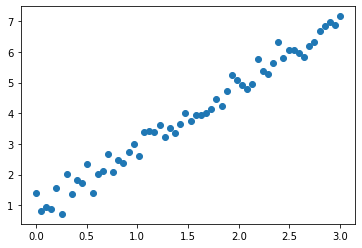

In [ ]:
#The process is basically the same if you consider a neural network.
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
#Make results repeatable
np.random.seed(1) 


M = 2
B = 0.9

NUM_EXAMPLES = 60
X = np.linspace(0, 3, NUM_EXAMPLES)
noise = np.random.randn(*x.shape) * 0.3
Y = M*X + B + noise

#I made the code LOOK like y=mx+b-- the equation is a noisy y = 2x + 0.9
#Let's see if we can get a model to predict that!

plt.scatter(X, Y) 
plt.show() 
#see how it is basically a line? But lots of variation.

In [ ]:
# define tensorflow variables, which marks them as changeable
m = tf.Variable(0.5) 
b = tf.Variable(2.0) 

print(m)                    # note under the hood tf.variable type
print(m.numpy(), b.numpy()) # numpy just takes the numerical component of the variable

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>
0.5 2.0


Loss: 0.08725389093160629
y = 1.94x + 1.04


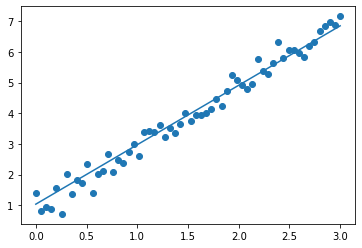

In [ ]:
def train_step():
  #Tape "tapes" all of the calculations in it's scope
  with tf.GradientTape(persistent=True) as tape:
    y_pred = m*x + b
    loss = ((y - y_pred) ** 2)
    loss = tf.reduce_sum(loss)
    loss = loss / NUM_EXAMPLES
  
  print(
      f'Loss: {loss.numpy()}\n'
      f'y = {m.numpy():.2f}x + {b.numpy():.2f}'
  )

  #calculate gradients with respect to loss
  m_gradient = tape.gradient(loss, m)
  b_gradient = tape.gradient(loss, b)

  LEARNING_RATE = 0.08
  
  m.assign_sub(LEARNING_RATE * m_gradient) # This is also known as gradient descent
  b.assign_sub(LEARNING_RATE * b_gradient)


train_step()
plot()

Loss: 0.08649612963199615
y = 1.94x + 1.04
Loss: 0.08578673005104065
y = 1.94x + 1.03
Loss: 0.08512263000011444
y = 1.95x + 1.02
Loss: 0.08450094610452652
y = 1.95x + 1.02
Loss: 0.08391895890235901
y = 1.95x + 1.01
Loss: 0.08337415754795074
y = 1.96x + 1.00
Loss: 0.08286413550376892
y = 1.96x + 1.00
Loss: 0.08238667994737625
y = 1.96x + 0.99
Loss: 0.0819397121667862
y = 1.96x + 0.99
Loss: 0.08152130991220474
y = 1.97x + 0.98
Loss: 0.08112959563732147
y = 1.97x + 0.98
Loss: 0.08076293021440506
y = 1.97x + 0.97
Loss: 0.08041965216398239
y = 1.98x + 0.97
Loss: 0.08009829372167587
y = 1.98x + 0.96
Loss: 0.07979746907949448
y = 1.98x + 0.96
Loss: 0.07951585203409195
y = 1.98x + 0.95
Loss: 0.0792522057890892
y = 1.98x + 0.95
Loss: 0.07900542765855789
y = 1.99x + 0.95
Loss: 0.07877437770366669
y = 1.99x + 0.94
Loss: 0.07855810225009918
y = 1.99x + 0.94
Loss: 0.07835562527179718
y = 1.99x + 0.94
Loss: 0.07816611230373383
y = 1.99x + 0.93
Loss: 0.07798866927623749
y = 2.00x + 0.93
Loss: 0.07782

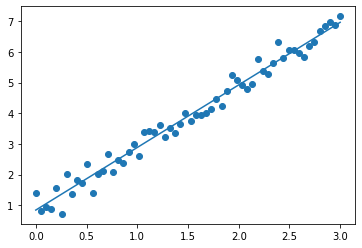

In [ ]:
EPOCHS = 80
for i in range(EPOCHS):
  train_step()
plot()